In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")


# Load the data again
with open("C:/Users/justi/Downloads/output.json", "r") as file:
    patents_data = json.load(file)

# Display the first few entries for inspection
patents_data[:2]


[{'lens_id': '188-042-825-946-495',
  'jurisdiction': 'US',
  'doc_number': '20230284427',
  'kind': 'A1',
  'date_published': '2023-09-07',
  'lang': 'en',
  'biblio': {'publication_reference': {'jurisdiction': 'US',
    'doc_number': '20230284427',
    'kind': 'A1',
    'date': '2023-09-07'},
   'application_reference': {'jurisdiction': 'US',
    'doc_number': '17686241',
    'date': '2022-03-03'},
   'priority_claims': {},
   'invention_title': [{'text': 'SRAM WITH P-TYPE ACCESS TRANSISTORS AND COMPLEMENTARY FIELD-EFFECT TRANSISTOR TECHNOLOGY'}],
   'parties': {'applicants': [{'extracted_name': {'value': 'Intel Corporation'}}],
    'inventors': [{'extracted_name': {'value': 'Charles AUGUSTINE'}},
     {'extracted_name': {'value': 'Seenivasan SUBRAMANIAM'}},
     {'extracted_name': {'value': 'Patrick MORROW'}},
     {'extracted_name': {'value': 'Muhammad M. KHELLAH'}}]},
   'classifications_cpc': {'classifications': [{'symbol': 'H01L27/1104'},
     {'symbol': 'G11C11/412'},
     {'sy

In [5]:
# Displaying the keys of the first patent dictionary
keys = patents_data[0].keys()
keys


dict_keys(['lens_id', 'jurisdiction', 'doc_number', 'kind', 'date_published', 'lang', 'biblio', 'legal_status', 'abstract', 'claims', 'description'])

In [12]:
# Extract the publication year from the 'date_published' field
df['year_published'] = df['date_published'].str[:4]

# Count the number of patents for each year
yearly_counts = df['year_published'].value_counts().sort_index()


In [13]:
# Checking the distribution of 'year_published' in the dataframe
print(df['year_published'].value_counts())


year_published
2023    500
Name: count, dtype: int64


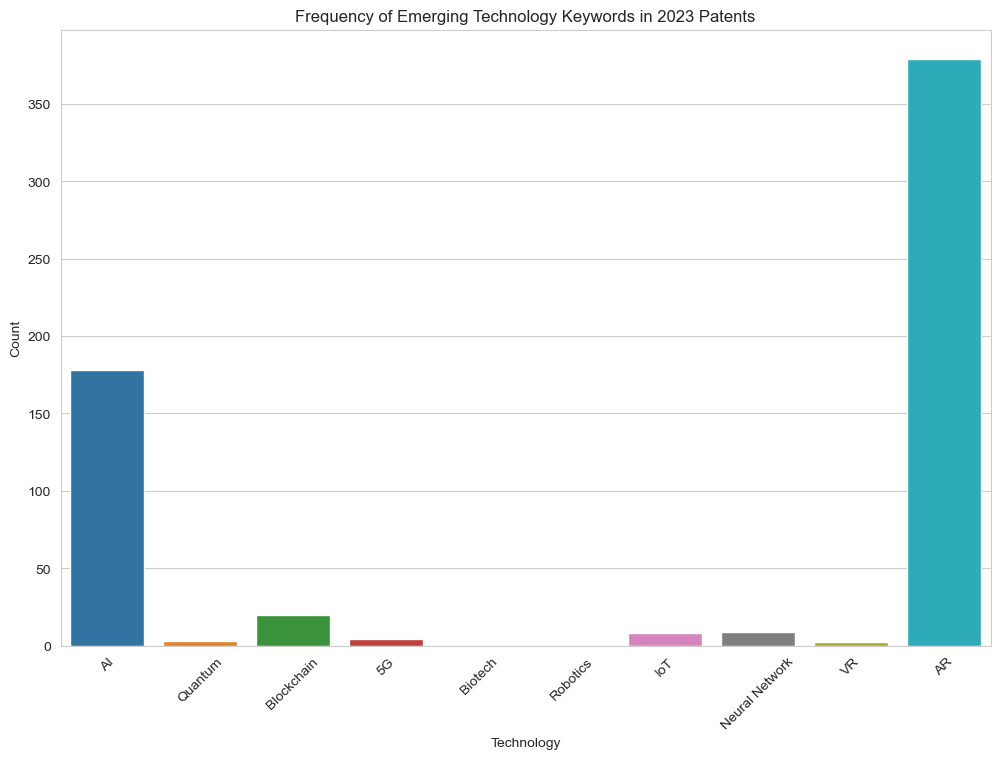

In [15]:
# Count occurrences of each keyword in titles and abstracts
counts = {keyword: 0 for keyword in keywords}

# Go through each patent and count the keywords
for patent in patents_data:
    title = patent["biblio"]["invention_title"][0]["text"]
    abstract = patent.get("abstract", [{}])[0].get("text", "")
    for keyword in keywords:
        if keyword.lower() in title.lower() or keyword.lower() in abstract.lower():
            counts[keyword] += 1

# Convert counts to a DataFrame for visualization
df_keywords = pd.DataFrame(list(counts.items()), columns=["Technology", "Count"])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_keywords, x="Technology", y="Count")
plt.title("Frequency of Emerging Technology Keywords in 2023 Patents")
plt.xticks(rotation=45)
plt.show()


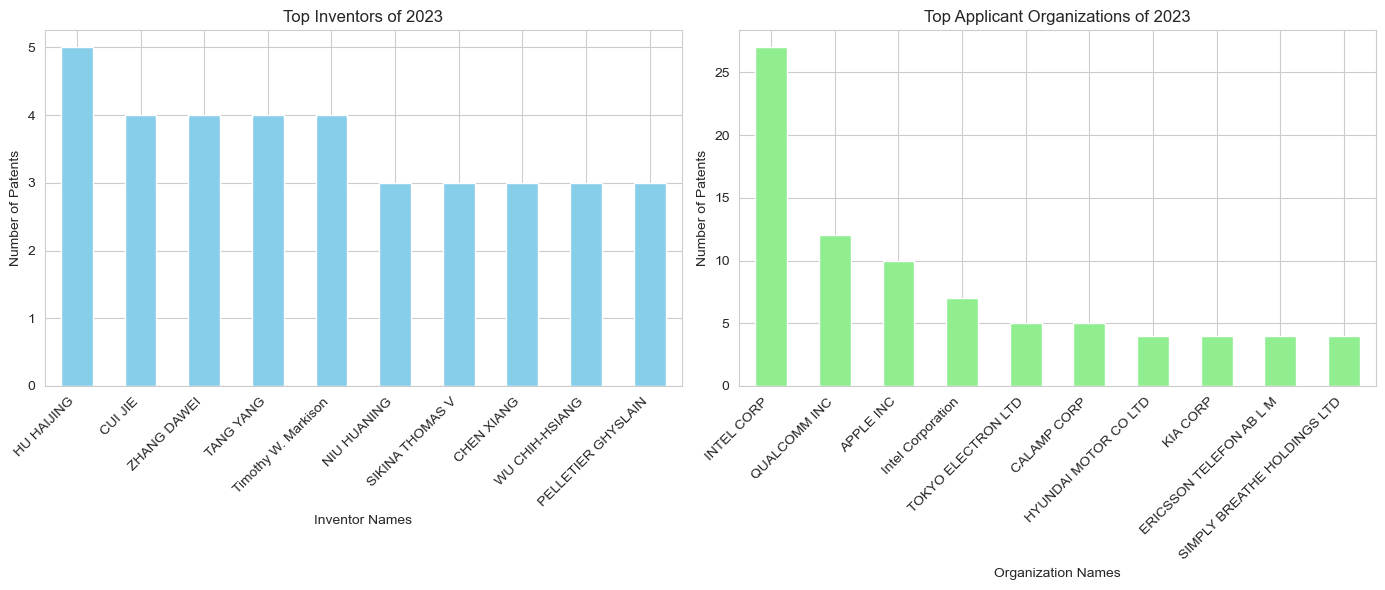

In [19]:
# Lists to hold inventors and applicants
inventors = []
applicants = []

# Iterate over the data to extract inventors and applicants
for patent in patents_data:
    if 'inventors' in patent['biblio']['parties']:
        inventors.extend([inv['extracted_name']['value'] for inv in patent['biblio']['parties']['inventors']])
    if 'applicants' in patent['biblio']['parties']:
        applicants.extend([app['extracted_name']['value'] for app in patent['biblio']['parties']['applicants']])

# Convert lists to Series
inventors_series = pd.Series(inventors)
applicants_series = pd.Series(applicants)

# Get top 10 inventors and applicants
top_inventors = inventors_series.value_counts().head(10)
top_applicants = applicants_series.value_counts().head(10)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_inventors.plot(kind='bar', color='skyblue')
plt.title('Top Inventors of 2023')
plt.ylabel('Number of Patents')
plt.xlabel('Inventor Names')
plt.xticks(rotation=45, ha="right")

plt.subplot(1, 2, 2)
top_applicants.plot(kind='bar', color='lightgreen')
plt.title('Top Applicant Organizations of 2023')
plt.ylabel('Number of Patents')
plt.xlabel('Organization Names')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


For the first insight, we've analyzed emerging technologies by checking how often specific keywords appear in patent titles and abstracts. For the second insight, we've identified top inventors and applicant organizations, which can serve as a proxy for understanding which entities are leading the innovation in the technology sector.

In [ ]:
# 3. Geographical Hotspots for Innovation

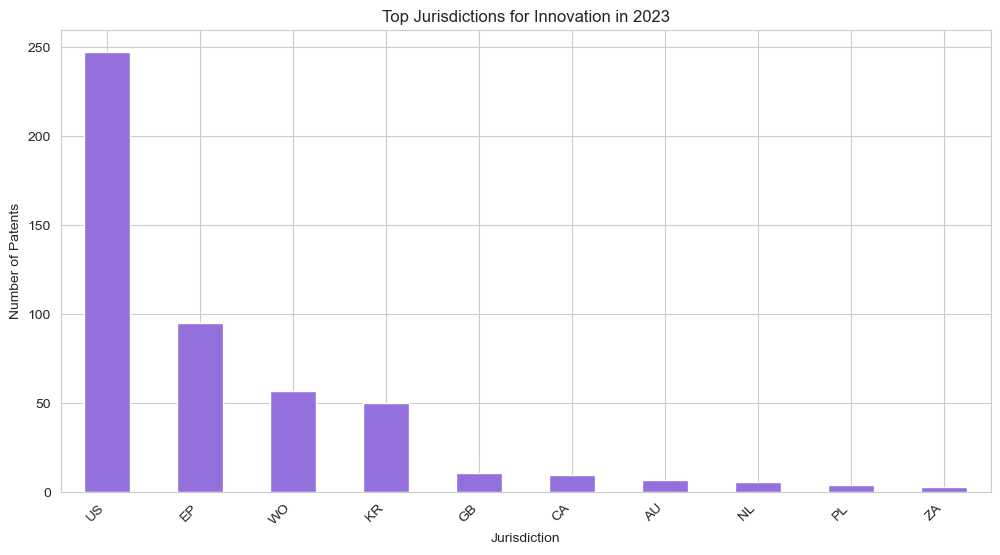

In [20]:
# Extract jurisdictions and count the number of patents for each
jurisdictions = [patent['jurisdiction'] for patent in patents_data]
jurisdictions_series = pd.Series(jurisdictions)
jurisdiction_counts = jurisdictions_series.value_counts()

# Display top jurisdictions with the highest number of patent filings
top_jurisdictions = jurisdiction_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_jurisdictions.plot(kind='bar', color='mediumpurple')
plt.title('Top Jurisdictions for Innovation in 2023')
plt.ylabel('Number of Patents')
plt.xlabel('Jurisdiction')
plt.xticks(rotation=45, ha="right")
plt.show()


The bar chart shows the top jurisdictions for innovation in 2023, based on the number of patents filed. This provides a quick view of which regions are leading in innovation and patent activity.

From the graph, you can see the jurisdictions with the highest number of patents filed. This can guide decisions on where to invest, set up businesses, or establish research collaborations.

# Connect Azure

In [21]:
from azure.storage.blob import BlobServiceClient

# Your Azure Blob Storage account name and account key
account_name = 'ilab9788543873'
account_key = 'TAyrrfaiCQ86vkgSXyStufowrMVdk4T45mVw6TNcFFJocR6pTXy6ZMSUUTeeh5FpNTsBVAbVqdwk+AStHA3x1g=='

# Connect to your Blob Storage account
blob_service_client = BlobServiceClient(account_url=f"https://ilab9788543873.blob.core.windows.net", credential=account_key)

# Name of the container you want to access
container_name = 'azureml'
container_client = blob_service_client.get_container_client(container_name)

# List all blobs (files) in the container
blobs = container_client.list_blobs()
for blob in blobs:
    print(blob.name)


ComputeRecord/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/compute_record.txt
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver/stderr
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver/stdout
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-92238893.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-e5612677.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-e8544025.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/livy
output.json


Download data from Azure

In [26]:
import json
from azure.storage.blob import BlobServiceClient

# Set up the BlobServiceClient with your account info
account_name = 'ilab9788543873'
account_key = 'TAyrrfaiCQ86vkgSXyStufowrMVdk4T45mVw6TNcFFJocR6pTXy6ZMSUUTeeh5FpNTsBVAbVqdwk'

container_name = 'azureml'
blob_name = '10k_lens.json'

blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

# Assuming you've already connected to the blob service client and container client
blob_client = container_client.get_blob_client(blob=blob_name)

# Try to download the blob content
try:
    downloaded_blob = blob_client.download_blob()
    data = downloaded_blob.readall()
    data_str = data.decode('utf-8')
    print("Blob content:", data_str[:1000])  # Print the first 1000 characters of the blob
except Exception as e:
    print("Error occurred:", e)



Blob content: [{"lens_id": "188-042-825-946-495", "jurisdiction": "US", "doc_number": "20230284427", "kind": "A1", "date_published": "2023-09-07", "lang": "en", "biblio": {"publication_reference": {"jurisdiction": "US", "doc_number": "20230284427", "kind": "A1", "date": "2023-09-07"}, "application_reference": {"jurisdiction": "US", "doc_number": "17686241", "date": "2022-03-03"}, "priority_claims": {}, "invention_title": [{"text": "SRAM WITH P-TYPE ACCESS TRANSISTORS AND COMPLEMENTARY FIELD-EFFECT TRANSISTOR TECHNOLOGY"}], "parties": {"applicants": [{"extracted_name": {"value": "Intel Corporation"}}], "inventors": [{"extracted_name": {"value": "Charles AUGUSTINE"}}, {"extracted_name": {"value": "Seenivasan SUBRAMANIAM"}}, {"extracted_name": {"value": "Patrick MORROW"}}, {"extracted_name": {"value": "Muhammad M. KHELLAH"}}]}, "classifications_cpc": {"classifications": [{"symbol": "H01L27/1104"}, {"symbol": "G11C11/412"}, {"symbol": "G11C11/419"}]}, "cited_by": {}}, "legal_status": {"pat

# Convert json to dataframe

In [140]:
import pandas as pd
import json

# Convert the JSON string to a list of dictionaries
data_list = json.loads(data_str)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Display the first row
print(df.iloc[0])

# Identify columns with nested data
nested_cols = [col for col in df.columns if isinstance(df[col].iloc[0], (dict, list))]
print("\nNested columns:", nested_cols)


lens_id                                         188-042-825-946-495
jurisdiction                                                     US
doc_number                                              20230284427
kind                                                             A1
date_published                                           2023-09-07
lang                                                             en
biblio            {'publication_reference': {'jurisdiction': 'US...
legal_status                           {'patent_status': 'UNKNOWN'}
abstract          [{'text': 'Embodiments herein relate to scalin...
claims            [{'claims': [{'claim_text': ['1 . An apparatus...
description       {'text': 'FIELD The present application genera...
Name: 0, dtype: object

Nested columns: ['biblio', 'legal_status', 'abstract', 'claims', 'description']


In [141]:
def unnest_dataframe(df):
    """
    Recursively unnest columns with dictionary type until no more such columns exist.
    """
    while any(df[col].apply(lambda x: isinstance(x, dict)).any() for col in df):
        for column in df.columns:
            if df[column].apply(lambda x: isinstance(x, dict)).any():
                # Unnest the column
                temp_df = df[column].apply(pd.Series)
                temp_df.columns = [f"{column}_{subcol}" for subcol in temp_df.columns]
                
                # Drop the original column and concat the new columns
                df = df.drop(column, axis=1)
                df = pd.concat([df, temp_df], axis=1)
                
    return df

# Apply the function to the DataFrame
df = unnest_dataframe(df)


In [142]:
# Display the first row again to see the changes
print(df.iloc[0])

lens_id                                                                     188-042-825-946-495
jurisdiction                                                                                 US
doc_number                                                                          20230284427
kind                                                                                         A1
date_published                                                                       2023-09-07
lang                                                                                         en
abstract                                      [{'text': 'Embodiments herein relate to scalin...
claims                                        [{'claims': [{'claim_text': ['1 . An apparatus...
biblio_invention_title                        [{'text': 'SRAM WITH P-TYPE ACCESS TRANSISTORS...
legal_status_patent_status                                                              UNKNOWN
legal_status_granted                    

In [143]:
# Define a function to concatenate all texts from a list of dictionaries with 'text' key
def concatenate_texts_from_list(data):
    texts = []
    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict) and 'text' in item:
                texts.append(item['text'])
    return ' '.join(texts)

# Identify columns with lists that contain dictionaries with a 'text' key
columns_with_text_list = ['abstract', 'biblio_invention_title']

# Concatenate texts for the identified columns
for col in columns_with_text_list:
    new_col_name = f"{col}_text"
    df[new_col_name] = df[col].apply(concatenate_texts_from_list)

# For 'claims' column, extract all claim texts and concatenate them
def concatenate_all_claim_texts(claims):
    claim_texts = []
    if isinstance(claims, list):
        for claim in claims:
            if isinstance(claim, dict) and 'claims' in claim:
                for sub_claim in claim['claims']:
                    if isinstance(sub_claim, dict) and 'claim_text' in sub_claim:
                        claim_texts.extend(sub_claim['claim_text'])
    return ' '.join(claim_texts)

df['all_claim_texts'] = df['claims'].apply(concatenate_all_claim_texts)


In [145]:
# Define a function to extract 'value' from 'extracted_name' key in a list of dictionaries
def extract_values_from_extracted_name(data):
    values = []
    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict) and 'extracted_name' in item and 'value' in item['extracted_name']:
                values.append(item['extracted_name']['value'])
    return ', '.join(values)

# List of columns to apply the above function
cols_to_extract = ['biblio_parties_applicants', 'biblio_parties_inventors']

# Apply the function to the columns
for col in cols_to_extract:
    new_col_name = f"{col}_names"
    df[new_col_name] = df[col].apply(extract_values_from_extracted_name)


In [149]:
# Extract 'symbol' values from each dictionary in the list and join them into a single string
df['biblio_classifications_cpc_symbols'] = df['biblio_classifications_cpc_classifications'].apply(lambda x: ', '.join([i['symbol'] for i in x]) if isinstance(x, list) else None)

In [150]:
# List of columns to drop
cols_to_drop = ['abstract', 'claims', 'biblio_invention_title', 'biblio_parties_applicants', 'biblio_parties_inventors', 'biblio_classifications_cpc_classifications']

# Drop columns
df = df.drop(columns=cols_to_drop, errors='ignore')


In [151]:
# Display the first row again to see the changes
print(df.iloc[0])

lens_id                                                                     188-042-825-946-495
jurisdiction                                                                                 US
doc_number                                                                          20230284427
kind                                                                                         A1
date_published                                                                       2023-09-07
lang                                                                                         en
legal_status_patent_status                                                              UNKNOWN
legal_status_granted                                                                        NaN
legal_status_grant_date                                                                     NaN
description_text                              FIELD The present application generally relate...
description_0                           

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   lens_id                                     10000 non-null  object 
 1   jurisdiction                                10000 non-null  object 
 2   doc_number                                  10000 non-null  object 
 3   kind                                        10000 non-null  object 
 4   date_published                              10000 non-null  object 
 5   lang                                        10000 non-null  object 
 6   legal_status_patent_status                  10000 non-null  object 
 7   legal_status_granted                        3669 non-null   object 
 8   legal_status_grant_date                     3645 non-null   object 
 9   description_text                            1959 non-null   object 
 10  description

# Data Cleaning

0. Making a copy of the df

In [153]:
df_clean = df

1. Convert Data Types
Convert date_published, biblio_publication_reference.date, and biblio_application_reference.date to datetime data type.

In [164]:
# Convert columns with dates to datetime data type and extract only the date component
date_columns = ['date_published', 'legal_status_grant_date', 'biblio_publication_reference_date', 'biblio_application_reference_date' 'biblio_priority_claims_earliest_claim_date']
for col in date_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce').dt.date


C:\Users\justi\AppData\Local\Temp\ipykernel_24052\219088533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce').dt.date
C:\Users\justi\AppData\Local\Temp\ipykernel_24052\219088533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce').dt.date
C:\Users\justi\AppData\Local\Temp\ipykernel_24052\219088533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

2. Filter lang to 'en'

In [155]:
# Filter rows where 'lang' is 'en'
df_clean = df_clean[df_clean['lang'] == 'en']


3. Handle Missing Values
In this dataset, we might not want to drop all rows with missing values since that could significantly reduce our data. Instead, for columns like abstract, description_text, and other text fields, we can replace NaNs with empty strings. For other columns, we'll make decisions based on the column's significance.

In [159]:
# Calculate the percentage of missing values for each column
missing_percent = df_clean.isnull().mean() * 100

# Drop columns with more than 80% missing values
cols_to_drop = missing_percent[missing_percent > 80].index.tolist()
df_clean.drop(columns=cols_to_drop, inplace=True)


C:\Users\justi\AppData\Local\Temp\ipykernel_24052\3274285990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=cols_to_drop, inplace=True)


4. Text normalisation

In [168]:
# Trim whitespace from text columns
text_columns = ['abstract_text', 'all_claim_texts', 'biblio_invention_title_text', 'description_text', 'biblio_parties_inventors_names']
for col in text_columns:
    df_clean[col] = df_clean[col].str.strip()
    
# Convert text columns to lowercase
for col in text_columns:
    df_clean[col] = df_clean[col].str.lower()


C:\Users\justi\AppData\Local\Temp\ipykernel_24052\3912895709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].str.strip()
C:\Users\justi\AppData\Local\Temp\ipykernel_24052\3912895709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].str.lower()


In [171]:
df_clean.reset_index(drop=True, inplace=True)


# 1. Keyword analysis

Remove punctuation and numbers

In [175]:
import string

text_columns = ['abstract_text', 'all_claim_texts', 'biblio_invention_title_text', 'description_text']

def remove_punctuation_and_numbers(text):
    if not isinstance(text, str):  # Check if the input is a string
        return text  # If not, return the input as it is
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    return text


for col in text_columns:
    df_clean[col] = df_clean[col].apply(remove_punctuation_and_numbers)


C:\Users\justi\AppData\Local\Temp\ipykernel_24052\75208684.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].apply(remove_punctuation_and_numbers)
C:\Users\justi\AppData\Local\Temp\ipykernel_24052\75208684.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].apply(remove_punctuation_and_numbers)
C:\Users\justi\AppData\Local\Temp\ipykernel_24052\75208684.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

Remove stopwords

In [177]:
pd.options.mode.chained_assignment = None  # default='warn'

In [178]:
from nltk.corpus import stopwords

# Define the stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Ensure the text is a string
    text = str(text)
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply the function to each text column
for col in text_columns:
    # Fill NaN with empty string
    df_clean[col] = df_clean[col].fillna('')
    df_clean[col] = df_clean[col].apply(remove_stopwords)


Stemming/Lemmatization

In [179]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

for col in text_columns:
    df_clean[col] = df_clean[col].apply(lemmatize_text)


Keyword extraction (TF-IDF, N-gram)

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(2, 3))

# For simplicity, let's consider the 'abstract_text' column for keyword extraction
tfidf_matrix = vectorizer.fit_transform(df_clean['abstract_text'])

# Get feature names (keywords/phrases)
feature_names = vectorizer.get_feature_names_out()

def get_top_keywords(tfidf_matrix, feature_names, n=10):
    '''Get top n keywords for each document in the matrix.'''
    keywords_list = []
    dense_matrix = tfidf_matrix.todense()
    for doc in dense_matrix:
        sorted_indices = np.argsort(doc)
        top_indices = sorted_indices[0, -n:]
        keywords = [feature_names[i] for i in top_indices[0, ::-1].tolist()[0]]
        keywords_list.append(keywords)
    return keywords_list

df_clean['top_keywords'] = get_top_keywords(tfidf_matrix, feature_names)



In [183]:
df_clean['top_keywords']

0       [word line, access memory, random access memor...
1       [communication technology, équipement utilisat...
2       [electric machine, first portion, method inclu...
3       [technology de, de technology, de information,...
4       [invention discloses, équipement utilisateur, ...
                              ...                        
2269    [équipement utilisateur, disclosure enables va...
2270    [second set, data second, comprising first, sy...
2271    [accelerator device, logic unit, device commun...
2272    [le second, technology system, computer progra...
2273    [de la, par le, de surveillance de, surveillan...
Name: top_keywords, Length: 2274, dtype: object

Topic modelling

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

df_clean['concatenated_text'] = df_clean['description_text'].fillna('') + ' ' + df_clean['abstract_text'].fillna('') + ' ' + df_clean['biblio_invention_title_text'].fillna('') + ' ' + df_clean['all_claim_texts'].fillna('')

# Create a vectorizer instance
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(df_clean['concatenated_text'])


In [186]:
from sklearn.decomposition import LatentDirichletAllocation

# 2. Apply LDA
num_topics = 10  # You can change this number based on your requirements
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(data_vectorized)

LatentDirichletAllocation(random_state=42)

In [187]:
# 3. Display the top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

feature_names = vectorizer.get_feature_names_out()
print_top_words(lda_model, feature_names)

Topic #0: application light embodiment material example voltage present surface invention current
Topic #1: signal example ue second communication rat radio wireless station antenna
Topic #2: patent data mtu period example unit computer invention fig application
Topic #3: layer second fig embodiment example region structure surface material portion
Topic #4: embodiment acid compound example comprises group independently product andor agent
Topic #5: data network embodiment node example device application service andor storage
Topic #6: cell sequence fig power flow id method temperature heat embodiment
Topic #7: data device sensor model example image embodiment fig patient user
Topic #8: user data device example andor information service embodiment transaction fig
Topic #9: device example memory data embodiment network includes computing controller processor


In [188]:
''' 
Topic #0: Seems to revolve around materials and electrical properties. Keywords like "light", "voltage", "material", and "surface" hint at inventions related to materials science or electronics.
Topic #1: Clearly related to communications technology. Keywords like "signal", "communication", "radio", "wireless", and "antenna" point towards innovations in telecommunications, possibly mobile communication given the presence of "ue" (User Equipment) and "rat" (Radio Access Technology).
Topic #2: This topic seems to be about computer systems and data processing. Keywords like "data", "mtu" (Maximum Transmission Unit), "computer", and "fig" (figure) hint at systems or methods for processing or transmitting data.
Topic #3: This is related to structures and materials. Keywords like "layer", "region", "structure", and "portion" suggest inventions in the realm of material structures, possibly in nanotechnology or semiconductor designs.
Topic #4: Appears to be related to chemistry or pharmaceuticals. Words like "acid", "compound", "group", and "agent" suggest this could be about chemical compounds or drug formulations.
Topic #5: Concerns networking and data storage. "Network", "node", "data", "service", and "storage" are clear indicators of inventions in the realm of IT infrastructure or cloud services.
Topic #6: This might be about energy and thermodynamics. "Power", "flow", "temperature", and "heat" are indicative of inventions related to energy production or thermal management.
Topic #7: This seems to be related to medical or imaging devices. Keywords like "sensor", "model", "image", and "patient" hint at medical equipment or imaging technology.
Topic #8: This is about user-centric services and devices. "User", "information", "service", and "transaction" suggest this might be about e-commerce, online services, or user-interface innovations.
Topic #9: This seems to focus on computing devices and systems. "Device", "memory", "network", "computing", and "controller" point towards hardware or system-level innovations.
'''

' \nTopic #0: Seems to revolve around materials and electrical properties. Keywords like "light", "voltage", "material", and "surface" hint at inventions related to materials science or electronics.\nTopic #1: Clearly related to communications technology. Keywords like "signal", "communication", "radio", "wireless", and "antenna" point towards innovations in telecommunications, possibly mobile communication given the presence of "ue" (User Equipment) and "rat" (Radio Access Technology).\nTopic #2: This topic seems to be about computer systems and data processing. Keywords like "data", "mtu" (Maximum Transmission Unit), "computer", and "fig" (figure) hint at systems or methods for processing or transmitting data.\nTopic #3: This is related to structures and materials. Keywords like "layer", "region", "structure", and "portion" suggest inventions in the realm of material structures, possibly in nanotechnology or semiconductor designs.\nTopic #4: Appears to be related to chemistry or phar

In [195]:
# Get the topic distribution for documents
doc_topic_dist = lda_model.transform(data_vectorized)

# Assign dominant topic for each document
df_clean['dominant_topic'] = doc_topic_dist.argmax(axis=1)


0       3
1       1
2       3
3       5
4       6
       ..
2269    2
2270    9
2271    9
2272    8
2273    2
Name: dominant_topic, Length: 2274, dtype: int64

Validation

In [197]:
print(df_clean.iloc[0])

lens_id                                                                     188-042-825-946-495
jurisdiction                                                                                 US
doc_number                                                                          20230284427
kind                                                                                         A1
date_published                                                                       2023-09-07
lang                                                                                         en
legal_status_patent_status                                                              UNKNOWN
legal_status_granted                                                                        NaN
legal_status_grant_date                                                                     NaT
description_text                              field present application generally relates fi...
biblio_publication_reference_jurisdictio